In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [24]:
data = pd.read_csv("D:\ABtesting_dataset\marketing_AB.csv")
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [25]:
data.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [27]:
data.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


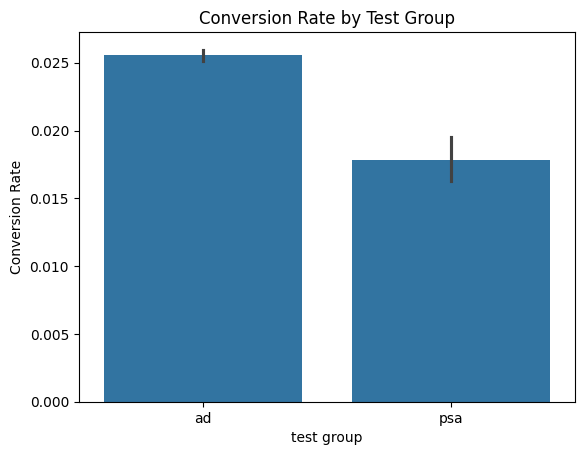

In [28]:
sns.barplot(x='test group', y='converted', data=data)
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.show()

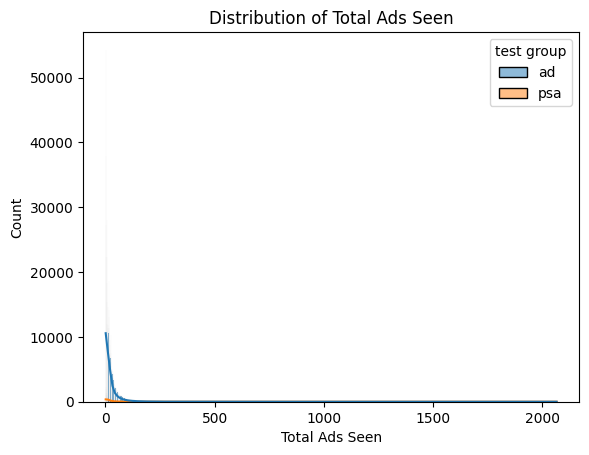

In [29]:
sns.histplot(data=data, x='total ads', hue='test group', kde=True)
plt.title('Distribution of Total Ads Seen')
plt.xlabel('Total Ads Seen')
plt.show()

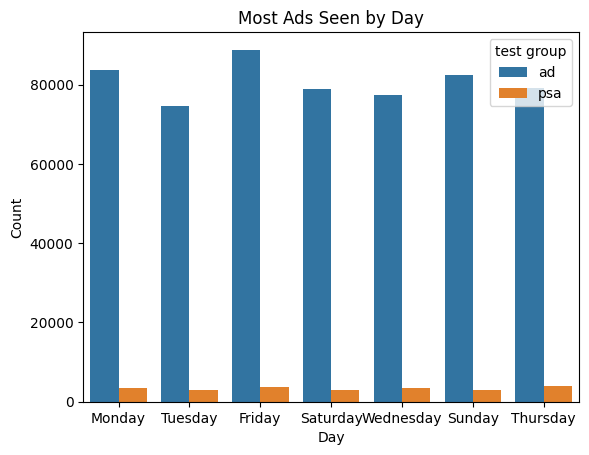

In [30]:
sns.countplot(x='most ads day', hue='test group', data=data)
plt.title('Most Ads Seen by Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

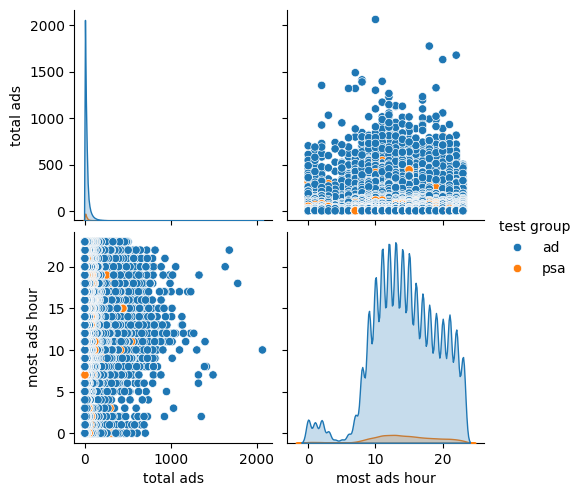

In [31]:
sns.pairplot(data, hue='test group', vars=['total ads', 'most ads hour'])
plt.show()

In [32]:
ad_group = data[data['test group'] == 'ad']['converted']
psa_group = data[data['test group'] == 'psa']['converted']

t_stat, p_val = stats.ttest_ind(ad_group, psa_group)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference in conversion rates.")


T-statistic: 7.37040597428566, P-value: 1.7033052627831264e-13
Reject the null hypothesis: There is a statistically significant difference in conversion rates.


Given the extremely low p-value (1.70e-13), we reject the null hypothesis, which stated that there is no difference in conversion rates between the two groups. The results indicate a statistically significant difference in conversion rates between users who saw ads and those who saw public service announcements.